<a href="https://colab.research.google.com/github/nairkarthik02/Mini-Project/blob/main/project_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
mkdir IMAGES

In [3]:
from bing_image_downloader import downloader
downloader.download("trucks",limit=35,output_dir='IMAGES',
                    adult_filter_off=True)

[%] Downloading Images to /content/IMAGES/trucks


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/c0/3d/eb/c03deb02bec25f1cc73ded710c3c91ad.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/8b/34/b0/8b34b0055e20d54f1fafd31bb5973599.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/57/ea/b4/57eab41a071ce593e0f75a2ffc883833--pickup-knight.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.motorbiscuit.com/wp-content/uploads/2019/11/Attendees-check-out-a-vintage-Chevrolet-pickup-truck.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://smclassiccars.com/uploads/postfotos/1948-chevrolet-pickup-3100-a-true-custom-classic-2.JPG
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/b4/8c/b5/b48cb505603b18254b6113d7b2637e43.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.the

In [4]:
from bing_image_downloader import downloader
downloader.download("aeroplane",limit=35,output_dir='IMAGES',
                    adult_filter_off=True)

[%] Downloading Images to /content/IMAGES/aeroplane


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://www.rd.com/wp-content/uploads/2020/01/GettyImages-1131335393-e1580493890249-scaled.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://1.bp.blogspot.com/-BXKO1VyjlWk/UA5yfCdFsII/AAAAAAAAH4E/K5M0ePZgOV0/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(30).jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://1.bp.blogspot.com/-0RJR9qpu2D8/UA50waJTocI/AAAAAAAAH6I/WbDWYn4TD3A/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(40).jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://4.bp.blogspot.com/-_ur8aZKwrOs/UA5zZ1CaCcI/AAAAAAAAH48/H8sUx3YF5MY/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(66).jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://1.bp.blogspot.com/-iWZuTbn7f5E/UA5zW7ra8iI/AAAAAAAAH4s/AYDd7Euys8I/s1600/Airplane_aeroplane_aircraft_jet_wallpapers+(54).jpg
[%] File Downloaded 

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


target=[]
images=[]
flat_data=[]

#date file path
Dtadir='/content/IMAGES'

#category fixing
Cat=['trucks','aeroplane']

for catgory in Cat:
  class_index=Cat.index(catgory)    #indexing values
  path=os.path.join(Dtadir,catgory)   #path created
  for img in os.listdir(path):
    imgarr=imread(os.path.join(path,img))
    #print(imgarr.shape)
    #plt.imshow(imgarr)
    imgrsiz=resize(imgarr,(130,130,3))
    flat_data.append(imgrsiz.flatten())
    images.append(imgrsiz)
    target.append(class_index)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [6]:
len(flat_data[0])

50700

In [7]:
130*130*3

50700

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

<BarContainer object of 2 artists>

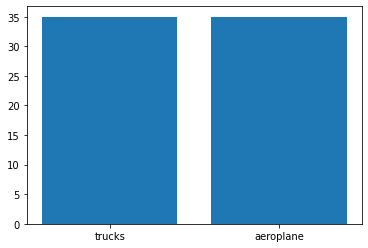

In [9]:
unique,count=np.unique(target,return_counts=True)
plt.bar(Cat,count)

In [10]:
#splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,
                                               target,test_size=0.3,random_state=105)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},

]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
ypred=clf.predict(x_test)
ypred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [13]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ypred,y_test)

0.8095238095238095

In [15]:
confusion_matrix(ypred,y_test)

array([[ 7,  1],
       [ 3, 10]])

In [16]:
import pickle
pickle.dump(clf,open('img_model_final','wb'))

In [17]:
model=pickle.load(open('/content/img_model_final','rb'))

Enter URL:https://www.diesel-plus.com/wp-content/uploads/2019/07/Airplane-Sky-201811-001-720x475.jpg
(475, 720, 3)
Predicted Output:aeroplane


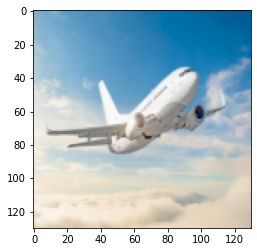

In [18]:
#new test
flat_data=[]
url=input("Enter URL:")
img=imread(url)
imgrsiz=resize(img,(130,130,3))
flat_data.append(imgrsiz.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(imgrsiz)
y_output=model.predict(flat_data)
y_output=Cat[y_output[0]]
print(f'Predicted Output:{y_output}')

In [19]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok


     |████████████████████████████████| 7.8MB 8.9MB/s 
     |████████████████████████████████| 112kB 50.9MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 174kB 45.9MB/s 
     |████████████████████████████████| 4.2MB 34.1MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 122kB 52.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=5b4e9b582a4805814b3afdb490277148121f6547113a18b6f4e7efc362f52e42
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 7.5MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=ac91cd1c82118f5f79390a69877f6bb40161d4b3f7cb8a8eb48e2e14dddd976e
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [25]:
#webapp using streamlit

%%writefile application.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image


st.title('Image CLassification ML')
st.write("This Web app uses ML")
st.set_option('deprecation.showfileUploaderEncodingn',False)
st.text('Upload image')

model=pickle.load(open('/content/img_model_final','rb'))

uploaded_file=st.file_uploader("choose image:",type='jpg')

if uploade_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Image Uploaded')

  if st.button('PREDICT'):
    Cat=['trucks','aeroplane']
    st.write('PREDICTED RESULT')
    flat_data=[]
    img=np.array(img)
    imgrsiz=resize(img,(130,130,3))
    flat_data.append(imgrsiz.flatten())
    flat_data=np.array(flat_data)
    y_output=model.predict(flat_data)
    y_output=Cat[y_output[0]]
    st.write(f'Predicted Output:{y_output}')
    q=model.predict_proba(flat_data)
    for index,item inenumerate(Cat):
      st.write(f'{item}:{q[0][index]*100}%')

Overwriting application.py


In [21]:
!nohup streamlit run app.py

url=ngrok.connect(port='80')
url

nohup: ignoring input and appending output to 'nohup.out'


<NgrokTunnel: "http://0505fb9ff5a8.ngrok.io" -> "http://localhost:80">